## Random Forest Model for Kepler Space Telescope Data

The purpose of this project is to reinforce my data science and machine learning knowledge, and to help others in their journeys. I'm not an expert on these topics, and I'm conscious that there are a lot of tools, concepts and techniques that I need to master. That's why I develop this project, to share with the community the tools, concepts and techniques, that I have learned across my data science journey. I'm open to comments, critics and feedback that would help me to develop learn best practices and corrections in case I was wrong

In [74]:
#import warnings
#warnings.simplefilter('ignore')
import pandas as pd
import numpy as np

In [75]:
kepler_df = pd.read_csv('../../data/exoplanet_data.csv')
kepler_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [76]:
kepler_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [77]:
kepler_df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [78]:
print(f"The dataframe has a length of {len(kepler_df.columns)} columns.")
print(f"There are 3 outcomes/predictions/targets: {set(kepler_df['koi_disposition'])}")

The dataframe has a length of 41 columns.
There are 3 outcomes/predictions/targets: {'CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'}


In [79]:
features = kepler_df.drop('koi_disposition', axis = 1)
target = kepler_df['koi_disposition'].values

print(features.shape)
print(target.shape)

(6991, 40)
(6991,)


### Non-Scaled

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [81]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (4893, 40)
Training Labels Shape: (4893,)
Testing Features Shape: (2098, 40)
Testing Labels Shape: (2098,)


In [82]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(target)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [83]:
print(encoded_y_train)
print(encoded_y_test)

[0 2 1 ... 2 2 2]
[2 0 2 ... 0 1 1]


In [84]:
categories = label_encoder.inverse_transform([0, 1, 2])
categories

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [87]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

rf.fit(X_train, encoded_y_train);

In [97]:
prediction = rf.predict(X_test)
label_pred = np.rint(prediction)

In [107]:
non_scaled_df = pd.DataFrame({'Prediction':prediction, 'Actual':encoded_y_test, 'Categorical Prediction':label_encoder.inverse_transform(label_pred.astype(int)), 'Categorical Actual':y_test}).reset_index(drop=True)
non_scaled_df.head(10)

,Prediction,Actual,Categorical Prediction,Categorical Actual
0,1.947,2,FALSE POSITIVE,FALSE POSITIVE
1,0.096,0,CANDIDATE,CANDIDATE
2,2.000,2,FALSE POSITIVE,FALSE POSITIVE
3,1.999,2,FALSE POSITIVE,FALSE POSITIVE
4,1.982,2,FALSE POSITIVE,FALSE POSITIVE
5,0.993,1,CONFIRMED,CONFIRMED
6,0.705,0,CONFIRMED,CANDIDATE
7,0.120,0,CANDIDATE,CANDIDATE
8,0.215,0,CANDIDATE,CANDIDATE
9,1.991,2,FALSE POSITIVE,FALSE POSITIVE


In [108]:
print(f"Non Scaled Score: {round(rf.score(X_test, encoded_y_test)*100,2)}%")

Non Scaled Score: 87.12%


In [109]:
important_features = list(rf.feature_importances_)
features_list = list(features.columns)
                          

In [110]:
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(features_list, important_features)]
feature_importances

[('koi_fpflag_nt', 0.272),
 ('koi_fpflag_ss', 0.23),
 ('koi_fpflag_co', 0.252),
 ('koi_fpflag_ec', 0.041),
 ('koi_period', 0.006),
 ('koi_period_err1', 0.002),
 ('koi_period_err2', 0.002),
 ('koi_time0bk', 0.006),
 ('koi_time0bk_err1', 0.003),
 ('koi_time0bk_err2', 0.003),
 ('koi_impact', 0.013),
 ('koi_impact_err1', 0.004),
 ('koi_impact_err2', 0.004),
 ('koi_duration', 0.007),
 ('koi_duration_err1', 0.003),
 ('koi_duration_err2', 0.003),
 ('koi_depth', 0.003),
 ('koi_depth_err1', 0.004),
 ('koi_depth_err2', 0.004),
 ('koi_prad', 0.005),
 ('koi_prad_err1', 0.004),
 ('koi_prad_err2', 0.004),
 ('koi_teq', 0.002),
 ('koi_insol', 0.002),
 ('koi_insol_err1', 0.003),
 ('koi_insol_err2', 0.002),
 ('koi_model_snr', 0.058),
 ('koi_tce_plnt_num', 0.002),
 ('koi_steff', 0.005),
 ('koi_steff_err1', 0.005),
 ('koi_steff_err2', 0.006),
 ('koi_slogg', 0.002),
 ('koi_slogg_err1', 0.003),
 ('koi_slogg_err2', 0.004),
 ('koi_srad', 0.003),
 ('koi_srad_err1', 0.004),
 ('koi_srad_err2', 0.003),
 ('ra', 0.

In [111]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Feature: koi_fpflag_nt        Importance: 0.272
Feature: koi_fpflag_co        Importance: 0.252
Feature: koi_fpflag_ss        Importance: 0.23
Feature: koi_model_snr        Importance: 0.058
Feature: koi_fpflag_ec        Importance: 0.041
Feature: koi_impact           Importance: 0.013
Feature: ra                   Importance: 0.008
Feature: koi_duration         Importance: 0.007
Feature: dec                  Importance: 0.007
Feature: koi_period           Importance: 0.006
Feature: koi_time0bk          Importance: 0.006
Feature: koi_steff_err2       Importance: 0.006
Feature: koi_prad             Importance: 0.005
Feature: koi_steff            Importance: 0.005
Feature: koi_steff_err1       Importance: 0.005
Feature: koi_kepmag           Importance: 0.005
Feature: koi_impact_err1      Importance: 0.004
Feature: koi_impact_err2      Importance: 0.004
Feature: koi_depth_err1       Importance: 0.004
Feature: koi_depth_err2       Importance: 0.004
Feature: koi_prad_err1        Importance:

In [112]:
feat_list = []
values_list = []
for pair in feature_importances:
    feat_list.append(pair[0])
    values_list.append(pair[1])

In [113]:
sorted_importances = np.sort(important_features)[::-1]
top_sort_importances = list(sorted_importances[0:10])

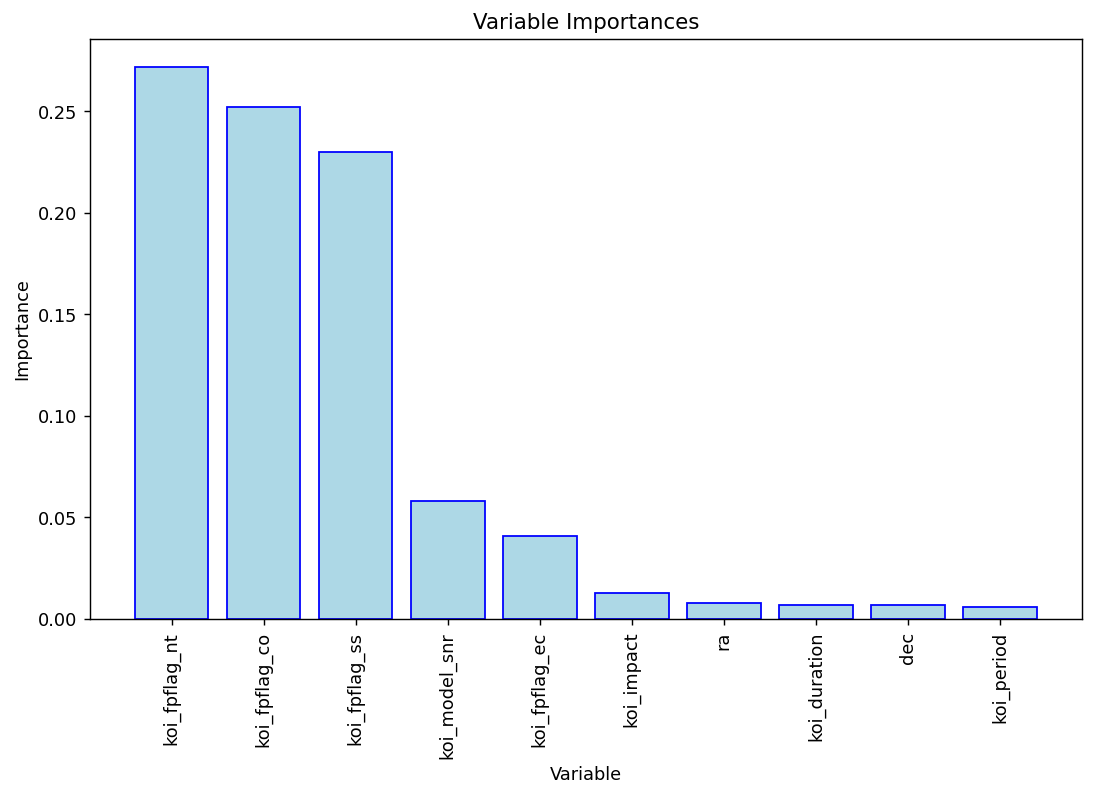

In [114]:
import matplotlib.pyplot as plt

x_val = list(range(len(values_list[:10])))
fig, ax = plt.subplots(figsize = (10, 6), dpi=128)

ax.bar(feat_list[:10], values_list[:10], orientation = 'vertical', color='lightblue', edgecolor='blue')
ax.set_xticklabels(feat_list[:10], rotation=90)
ax.set_ylabel('Importance')
ax.set_xlabel('Variable')
ax.set_title('Variable Importances')

plt.savefig('non_scaled_random_forest_top_features.png')
plt.show()

In [116]:
import plotly.express as px
from plotly.offline import offline

fig = px.bar(x=feat_list[:10], y=values_list[:10],
             color=values_list[:10],
             color_continuous_scale='blues')

fig.write_image("non_scaled_features_importance_bar_chart_randomforest.png")
offline.plot(fig, filename='non_scaled_features_importance_bar_chart_randomforest.html')
fig.show()

### Scaled

In [122]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [123]:
scaled_rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
scaled_rf.fit(X_train_scaled, encoded_y_train);

In [124]:
scaled_prediction = scaled_rf.predict(X_test_scaled)
scaled_label_pred = np.rint(scaled_prediction)

In [125]:
scaled_df = pd.DataFrame({'Prediction':scaled_prediction, 'Actual':encoded_y_test,'Categorical Prediction':label_encoder.inverse_transform(scaled_label_pred.astype(int)), 'Categorical Actual':y_test}).reset_index(drop=True)
scaled_df.head(10)

,Prediction,Actual,Categorical Prediction,Categorical Actual
0,1.955,2,FALSE POSITIVE,FALSE POSITIVE
1,0.092,0,CANDIDATE,CANDIDATE
2,1.999,2,FALSE POSITIVE,FALSE POSITIVE
3,2.000,2,FALSE POSITIVE,FALSE POSITIVE
4,1.989,2,FALSE POSITIVE,FALSE POSITIVE
5,0.989,1,CONFIRMED,CONFIRMED
6,0.703,0,CONFIRMED,CANDIDATE
7,0.124,0,CANDIDATE,CANDIDATE
8,0.215,0,CANDIDATE,CANDIDATE
9,1.985,2,FALSE POSITIVE,FALSE POSITIVE


In [174]:
print(f"Scaled Score: {round(scaled_rf.score(X_test_scaled, encoded_y_test)*100,2)}%")

ValueError: X has 5 features, but DecisionTreeRegressor is expecting 40 features as input.

In [127]:
scaled_important_features = list(scaled_rf.feature_importances_)

In [128]:
scaled_important_features

[0.27150927831101257,
 0.23028797614596502,
 0.25210682389470945,
 0.0413206622373412,
 0.005656149411192049,
 0.002540269580088866,
 0.0023324455994776683,
 0.006529846387324056,
 0.0030823131083860147,
 0.003170218090320563,
 0.013054041895847048,
 0.004150429383859208,
 0.004399585907428833,
 0.006750875292521153,
 0.0030544083535901153,
 0.002978872443141869,
 0.0034555124820244013,
 0.004182260707240283,
 0.00425899069241441,
 0.0049398856865654735,
 0.004132441142433092,
 0.0033053979248111247,
 0.002193207234953748,
 0.0015204761782574015,
 0.0026467707297541457,
 0.0016642527999642415,
 0.05836499935826693,
 0.0023614230291810834,
 0.00464333693304473,
 0.0051100184806452,
 0.005583152630682151,
 0.002341361381467613,
 0.0034304533523771322,
 0.0036081412827446025,
 0.0026421628095264034,
 0.003895367166395339,
 0.0027251375462255473,
 0.008184775847839647,
 0.006793292844316659,
 0.005092985716662892]

In [129]:
scaled_feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(features_list, scaled_important_features)]
scaled_feature_importances

[('koi_fpflag_nt', 0.272),
 ('koi_fpflag_ss', 0.23),
 ('koi_fpflag_co', 0.252),
 ('koi_fpflag_ec', 0.041),
 ('koi_period', 0.006),
 ('koi_period_err1', 0.003),
 ('koi_period_err2', 0.002),
 ('koi_time0bk', 0.007),
 ('koi_time0bk_err1', 0.003),
 ('koi_time0bk_err2', 0.003),
 ('koi_impact', 0.013),
 ('koi_impact_err1', 0.004),
 ('koi_impact_err2', 0.004),
 ('koi_duration', 0.007),
 ('koi_duration_err1', 0.003),
 ('koi_duration_err2', 0.003),
 ('koi_depth', 0.003),
 ('koi_depth_err1', 0.004),
 ('koi_depth_err2', 0.004),
 ('koi_prad', 0.005),
 ('koi_prad_err1', 0.004),
 ('koi_prad_err2', 0.003),
 ('koi_teq', 0.002),
 ('koi_insol', 0.002),
 ('koi_insol_err1', 0.003),
 ('koi_insol_err2', 0.002),
 ('koi_model_snr', 0.058),
 ('koi_tce_plnt_num', 0.002),
 ('koi_steff', 0.005),
 ('koi_steff_err1', 0.005),
 ('koi_steff_err2', 0.006),
 ('koi_slogg', 0.002),
 ('koi_slogg_err1', 0.003),
 ('koi_slogg_err2', 0.004),
 ('koi_srad', 0.003),
 ('koi_srad_err1', 0.004),
 ('koi_srad_err2', 0.003),
 ('ra', 0.

In [130]:
scaled_feature_importances = sorted(scaled_feature_importances, key = lambda x: x[1], reverse = True)
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in scaled_feature_importances];

Feature: koi_fpflag_nt        Importance: 0.272
Feature: koi_fpflag_co        Importance: 0.252
Feature: koi_fpflag_ss        Importance: 0.23
Feature: koi_model_snr        Importance: 0.058
Feature: koi_fpflag_ec        Importance: 0.041
Feature: koi_impact           Importance: 0.013
Feature: ra                   Importance: 0.008
Feature: koi_time0bk          Importance: 0.007
Feature: koi_duration         Importance: 0.007
Feature: dec                  Importance: 0.007
Feature: koi_period           Importance: 0.006
Feature: koi_steff_err2       Importance: 0.006
Feature: koi_prad             Importance: 0.005
Feature: koi_steff            Importance: 0.005
Feature: koi_steff_err1       Importance: 0.005
Feature: koi_kepmag           Importance: 0.005
Feature: koi_impact_err1      Importance: 0.004
Feature: koi_impact_err2      Importance: 0.004
Feature: koi_depth_err1       Importance: 0.004
Feature: koi_depth_err2       Importance: 0.004
Feature: koi_prad_err1        Importance:

In [131]:
scaled_vs_non_scaled = pd.DataFrame({'Scaled Feature Importances':scaled_feature_importances, 'Feature Importances':feature_importances}).reset_index(drop=True)
scaled_vs_non_scaled.head(10)

,Scaled Feature Importances,Feature Importances
0,"(koi_fpflag_nt, 0.272)","(koi_fpflag_nt, 0.272)"
1,"(koi_fpflag_co, 0.252)","(koi_fpflag_co, 0.252)"
2,"(koi_fpflag_ss, 0.23)","(koi_fpflag_ss, 0.23)"
3,"(koi_model_snr, 0.058)","(koi_model_snr, 0.058)"
4,"(koi_fpflag_ec, 0.041)","(koi_fpflag_ec, 0.041)"
5,"(koi_impact, 0.013)","(koi_impact, 0.013)"
6,"(ra, 0.008)","(ra, 0.008)"
7,"(koi_time0bk, 0.007)","(koi_duration, 0.007)"
8,"(koi_duration, 0.007)","(dec, 0.007)"
9,"(dec, 0.007)","(koi_period, 0.006)"


In [132]:
scfeat_list = []
scvalues_list = []
for pair in scaled_feature_importances:
    scfeat_list.append(pair[0])
    scvalues_list.append(pair[1])

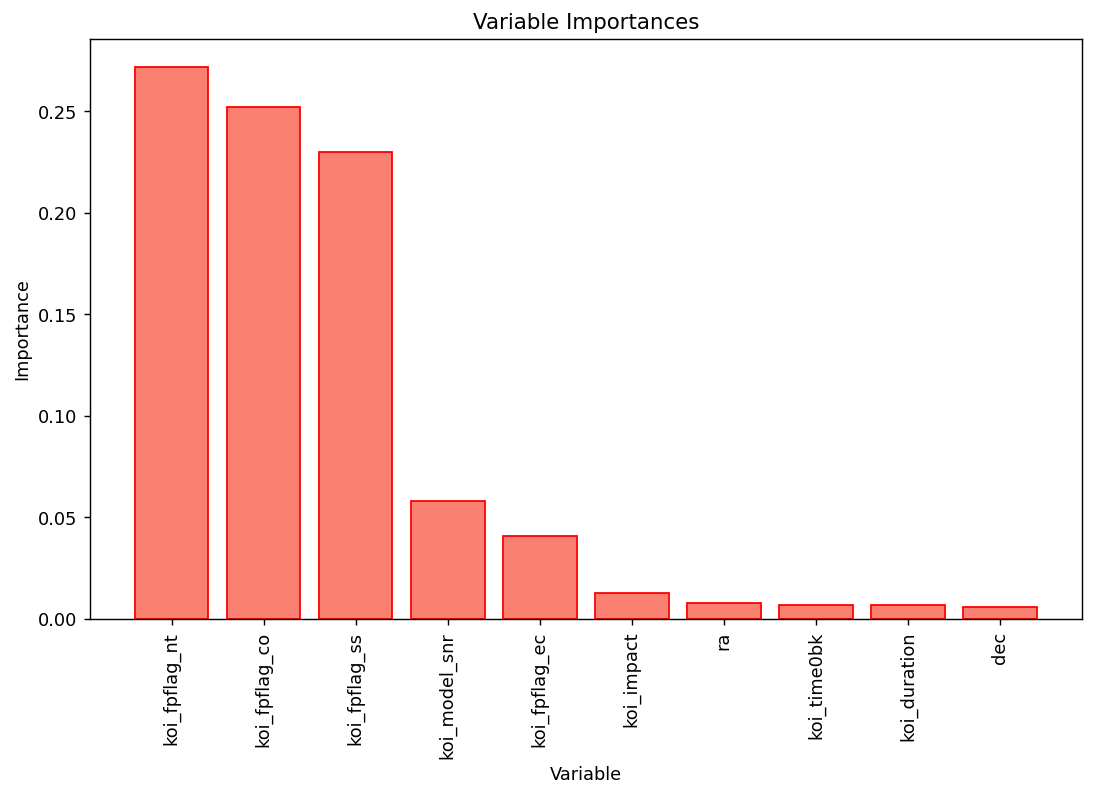

In [133]:
x_val = list(range(len(scvalues_list[:10])))
fig, ax = plt.subplots(figsize = (10, 6), dpi=128)

ax.bar(scfeat_list[:10], values_list[:10], orientation = 'vertical', color='salmon', edgecolor='red')
ax.set_xticklabels(scfeat_list[:10], rotation=90)
ax.set_ylabel('Importance')
ax.set_xlabel('Variable')
ax.set_title('Variable Importances')

plt.savefig('scaled_random_forest_top_features.png')
plt.show()

In [134]:
fig = px.bar(x=scfeat_list[:10], y=scvalues_list[:10],
             color=scvalues_list[:10],
             color_continuous_scale='redor')

fig.write_image("scaled_features_importance_bar_chart_randomforest.png")
offline.plot(fig, filename='scaled_features_importance_bar_chart_randomforest.html')
fig.show()

In [182]:
scfeat_list[:5]

['koi_fpflag_nt',
 'koi_fpflag_co',
 'koi_fpflag_ss',
 'koi_model_snr',
 'koi_fpflag_ec']

In [245]:
scores = []
for x in range(1, len(features.columns),4):
    top_10_scaled_features = scfeat_list[:x]
    rel_features = features.loc[:,top_10_scaled_features]
    X_train, X_test, y_train, y_test = train_test_split(rel_features, target, test_size = 0.3, random_state = 42)
    label_encoder = LabelEncoder()
    label_encoder.fit(target)
    encoded_y_train = label_encoder.transform(y_train)
    encoded_y_test = label_encoder.transform(y_test)
    categories = label_encoder.inverse_transform([0, 1, 2])
    X_scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    filtered_rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
    filtered_rf.fit(X_train_scaled, encoded_y_train)
    score = round(filtered_rf.score(X_test_scaled, encoded_y_test)*100,2)
    scores.append(score)

In [273]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1, len(features.columns),4), y=scores,
                    mode='lines+markers',
                    name='lines+markers',
                    line = dict(color='#00C897', width=2)))

fig.update_layout(title='Optimal Number of Variables for Random Forest Model',
                   xaxis_title='Top # Features',
                   yaxis_title='Model Score')
fig.write_image("optimal_number_of_variables_for_the_model.png")
offline.plot(fig, filename='optimal_number_of_variables_for_the_model.html')
fig.show()

In [274]:
scores = []
for x in range(15,19):
    top_10_scaled_features = scfeat_list[:x]
    rel_features = features.loc[:,top_10_scaled_features]
    X_train, X_test, y_train, y_test = train_test_split(rel_features, target, test_size = 0.3, random_state = 42)
    label_encoder = LabelEncoder()
    label_encoder.fit(target)
    encoded_y_train = label_encoder.transform(y_train)
    encoded_y_test = label_encoder.transform(y_test)
    categories = label_encoder.inverse_transform([0, 1, 2])
    X_scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    filtered_rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
    filtered_rf.fit(X_train_scaled, encoded_y_train)
    score = round(filtered_rf.score(X_test_scaled, encoded_y_test)*100,2)
    scores.append(score)

In [275]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(15,19), y=scores,
                    mode='lines+markers',
                    name='lines+markers',
                    line = dict(color='#56BBF1', width=2)))

fig.update_layout(title='Zoomed Optimal Number of Variables for Random Forest Model',
                   xaxis_title='Top # Features',
                   yaxis_title='Model Score')
fig.write_image("zoomed_optimal_number_of_variables_for_the_model.png")
offline.plot(fig, filename='zoomed_optimal_number_of_variables_for_the_model.html')
fig.show()

In [276]:
top_10_scaled_features = scfeat_list[:16]
rel_features = features.loc[:,top_10_scaled_features]
X_train, X_test, y_train, y_test = train_test_split(rel_features, target, test_size = 0.3, random_state = 42)

In [277]:
label_encoder = LabelEncoder()
label_encoder.fit(target)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
categories = label_encoder.inverse_transform([0, 1, 2])

In [278]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [279]:
filtered_rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
filtered_rf.fit(X_train_scaled, encoded_y_train);

In [280]:
filtered_scaled = filtered_rf.predict(X_test_scaled)
filt_scaled_pred = np.rint(filtered_scaled)

In [281]:
filtered_scaled_df = pd.DataFrame({'Prediction':filtered_scaled, 'Actual':encoded_y_test,'Categorical Prediction':label_encoder.inverse_transform(filt_scaled_pred.astype(int)), 'Categorical Actual':y_test}).reset_index(drop=True)
filtered_scaled_df.head(10)

,Prediction,Actual,Categorical Prediction,Categorical Actual
0,1.967,2,FALSE POSITIVE,FALSE POSITIVE
1,0.004,0,CANDIDATE,CANDIDATE
2,1.999,2,FALSE POSITIVE,FALSE POSITIVE
3,2.000,2,FALSE POSITIVE,FALSE POSITIVE
4,1.985,2,FALSE POSITIVE,FALSE POSITIVE
5,0.992,1,CONFIRMED,CONFIRMED
6,0.767,0,CONFIRMED,CANDIDATE
7,0.044,0,CANDIDATE,CANDIDATE
8,0.004,0,CANDIDATE,CANDIDATE
9,1.983,2,FALSE POSITIVE,FALSE POSITIVE


In [282]:
print(f"Filtered and Scaled Score: {round(filtered_rf.score(X_test_scaled, encoded_y_test)*100,2)}%")

Filtered and Scaled Score: 87.31%
